# Assigment 4
Chapter 04 (page  189): 13, 14, 16

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
import seaborn as sns
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Question 13

This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?  

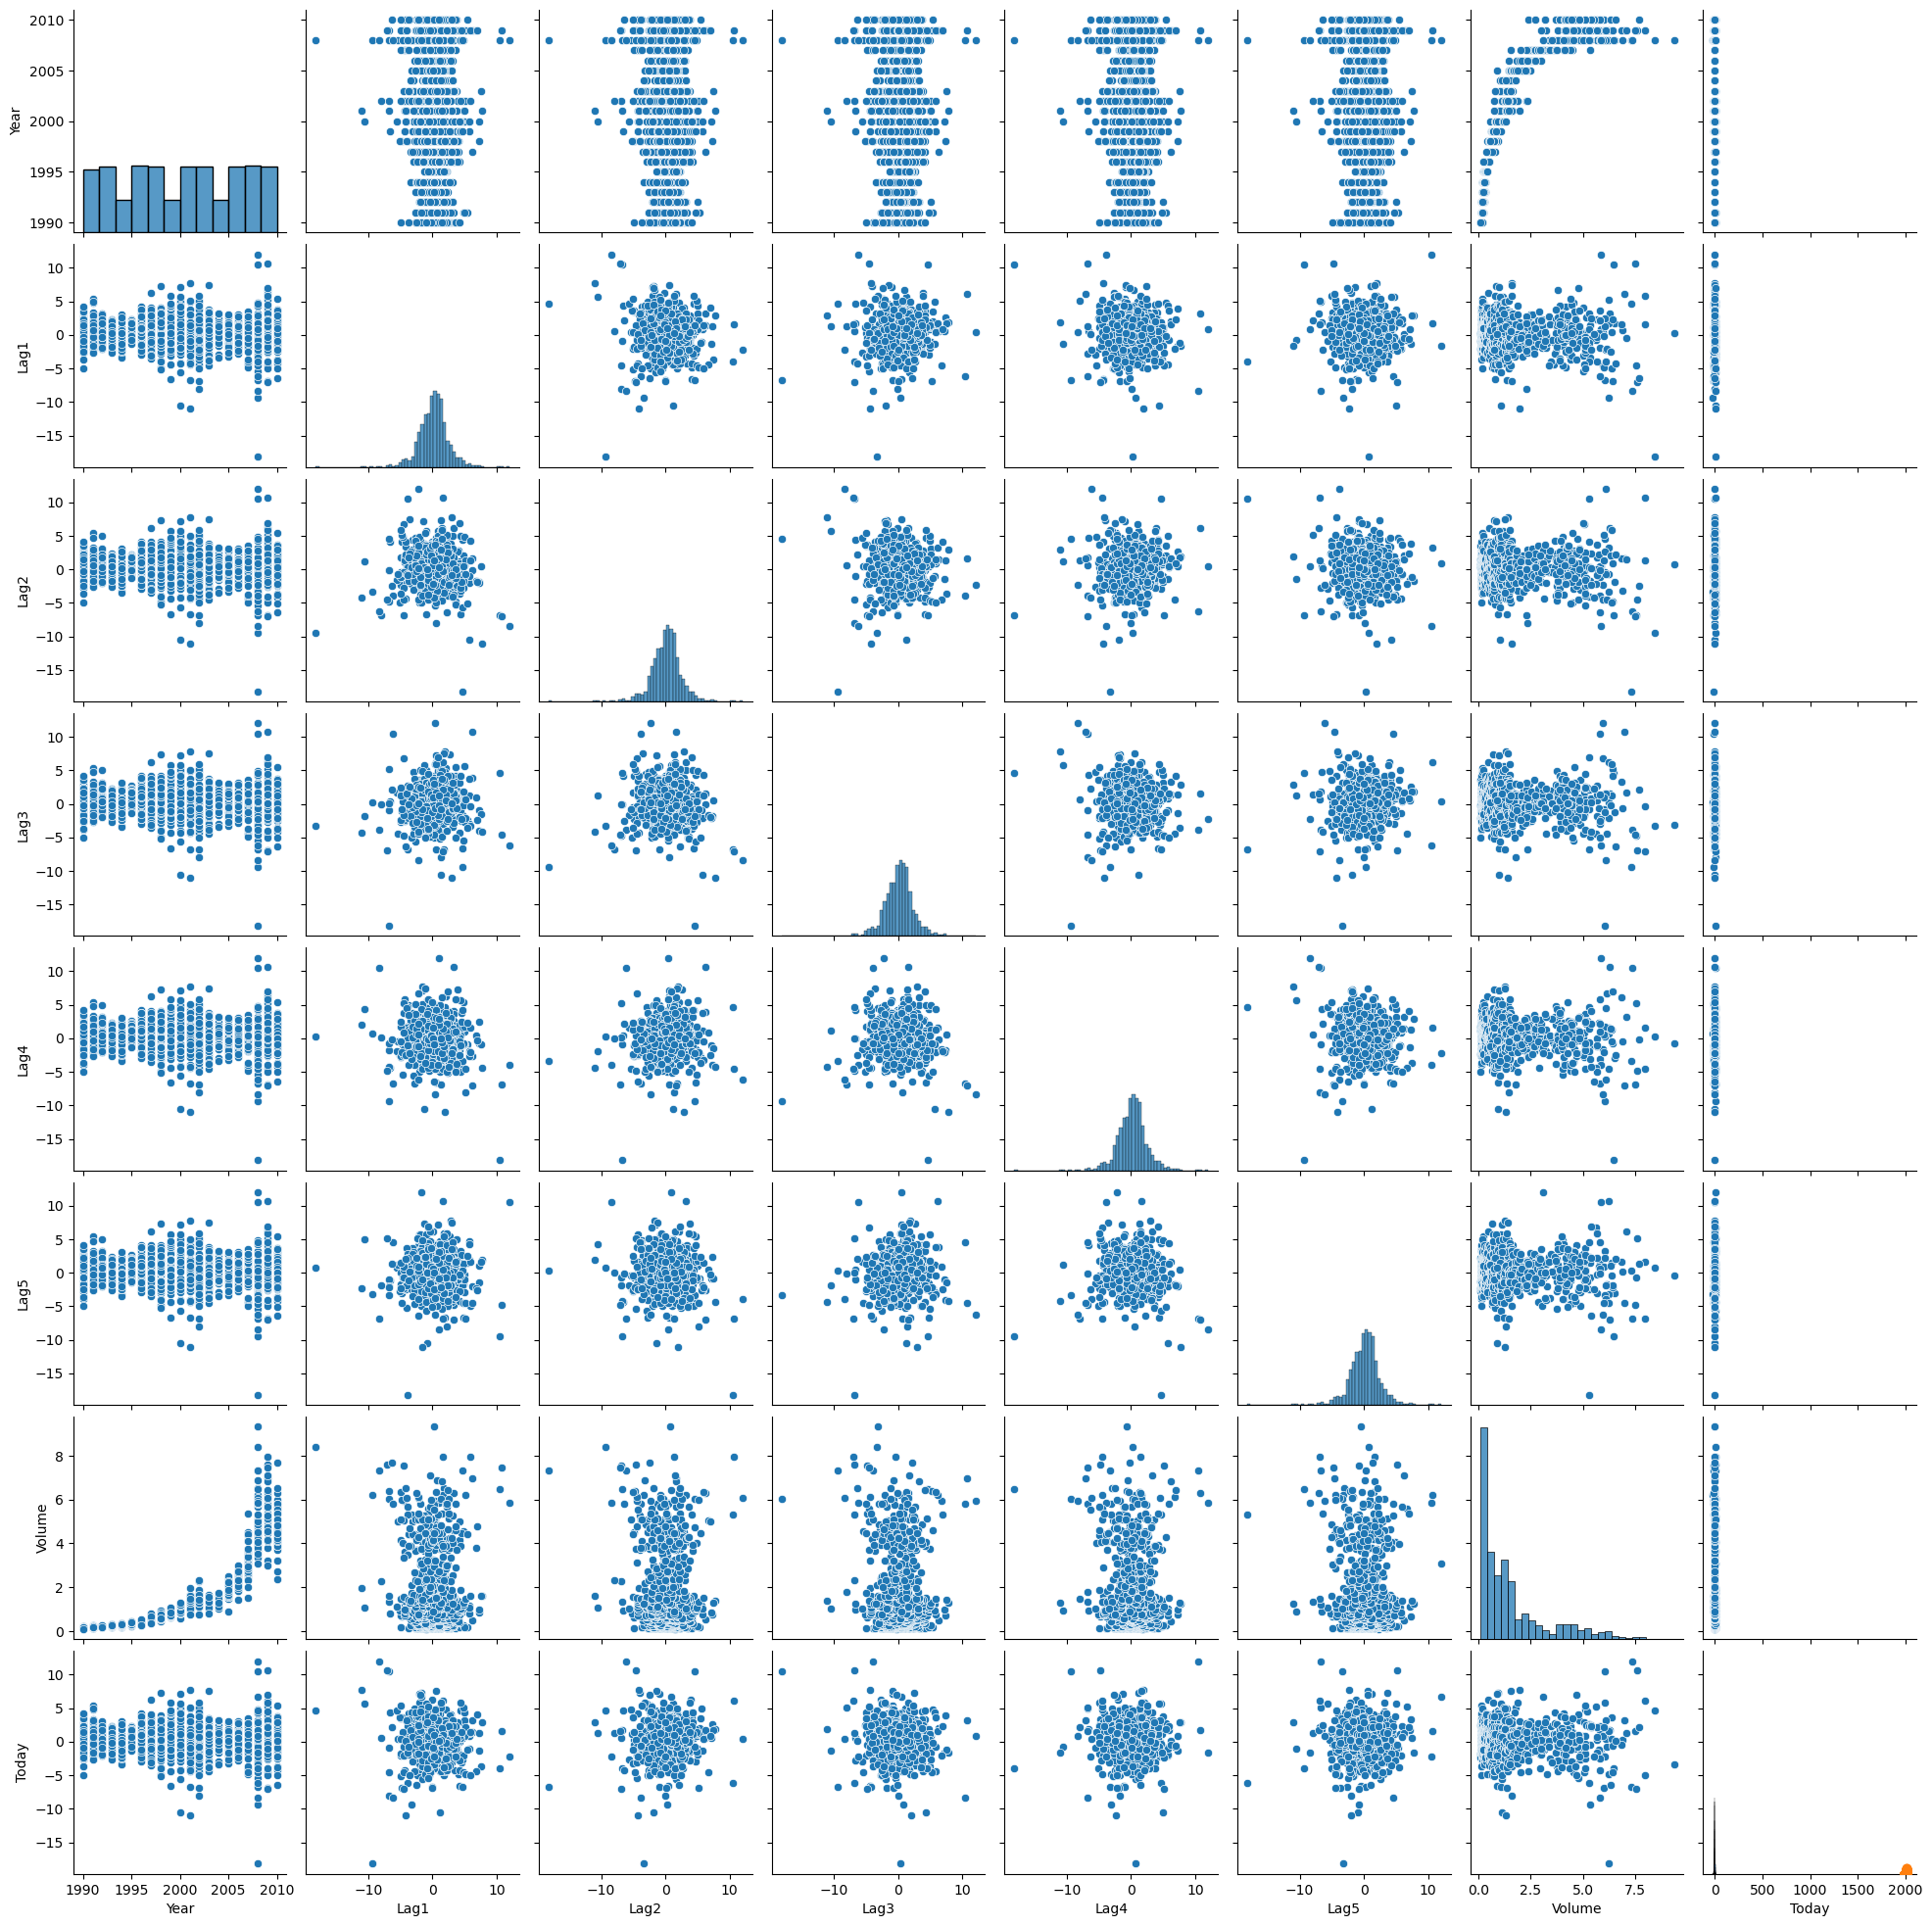

In [2]:
Weekly=load_data("Weekly")
Weekly.describe()
sns.pairplot(Weekly)
plt.scatter(Weekly['Year'],Weekly['Volume'])

##### Noticeable pattern between Year to Volume

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [3]:
allvars=Weekly.columns.drop(['Today','Direction','Year'])
design=MS(allvars)
X=design.fit_transform(Weekly)
y=Weekly.Direction=='Up'
glm=sm.GLM(y,X,family=sm.families.Binomial())
res=glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Wed, 25 Jun 2025   Deviance:                       1486.4
Time:                        19:43:59   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

#### Lag2 is statistically significant

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [5]:
probs=res.predict()
labels=np.array(['Down']*1089)
labels[probs>0.5]="Up"
ISLP.confusion_table(labels,Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [6]:
(557+54)/(54+557+430+48)

0.5610651974288338

The model's accuracy is 56%, just above random guessing. Most errors are false positives, 430 stocks were predicted to go up but actually went down, showing a strong bias toward predicting upward movement.

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [7]:
# selecting training period
train=(Weekly.Year<2009)
W_train=Weekly.loc[train].Lag2
W_test=Weekly.loc[~train].Lag2
W_test.shape

(104,)

In [8]:
#Refitting the new model
X_train, X_test = X.loc[train].Lag2, X.loc[~train].Lag2
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
#Designing the probabilities based on the training set
probs = results.predict(exog=X_test)

X_t=np.array(X_train)
XX=X_t.reshape(np.shape(X_t)[0],1)
X_ts=np.array(X_test)
Xts=X_ts.reshape(np.shape(X_ts)[0],1)

In [9]:
#Preparing the test set to compare with the corresponding training set in the confusion matrix
D=Weekly.Direction
Test_set=D.loc[~train]
Train_set=D.loc[train]
#Converting the probs matrix to a matrix filled with direction values
labels=np.array(['Down']*104)
labels[probs>0.5]='Up'
C=ISLP.confusion_table(labels,Test_set)
Train_s=np.array(Train_set)
TT=Train_s.reshape(np.shape(Train_set)[0],1)
Test_s=np.array(Test_set)
TS=Test_s.reshape(np.shape(Test_s)[0],1)
TS.shape

(104, 1)

In [10]:
C

Truth,Down,Up
Predicted,,
Down,20,24
Up,23,37


In [11]:
(20+37)/104

0.5480769230769231

The rate of correct predictions is around 55%.

(e) Repeat (d) using LDA.  
(f) Repeat (d) using QDA.  
(g) Repeat (d) using KNN with K = 1.  
(h) Repeat (d) using naive Bayes.  
(i) Which of these methods appears to provide the best results on
this data?  

In [14]:
# e
lda=LDA(store_covariance=True)
lda.fit(XX, Train_set)
lda_pred=lda.predict(Xts)
lda_predm=np.array(lda_pred)
lda_predm1=lda_predm.reshape(np.shape(lda_predm)[0],1)
ISLP.confusion_table(lda_predm1,TS)
(9+56)/104

0.625

In [15]:
# f
qda=QDA(store_covariance=True)
qda.fit(XX, Train_set)
qda_pred=qda.predict(Xts)
qda_predm=np.array(qda_pred)
qda_predm1=qda_predm.reshape(np.shape(lda_predm)[0],1)
ISLP.confusion_table(qda_predm1,TS)
61/(61+43)

0.5865384615384616

In [16]:
# g
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(XX, Train_set)
knn1_pred=knn1.predict(Xts)
knn1_predm=np.array(knn1_pred)
knn1_predm1=knn1_predm.reshape(np.shape(knn1_predm)[0],1)
ISLP.confusion_table(knn1_predm1,TS)
(22+30)/104

0.5

In [17]:
# h
NB = GaussianNB()
NB.fit(XX, Train_set)
NB_pred=NB.predict(Xts)
NB_predm=np.array(NB_pred)
NB_predm1=NB_predm.reshape(np.shape(NB_predm)[0],1)
ISLP.confusion_table(NB_predm1,TS)
61/104

0.5865384615384616

i  
LDA has the best results

(j) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [19]:
# Simple function to test all methods and find the best one
def find_best_model(XX, Train_set, Xts, TS):
    results = []
    
    # Test original features
    print("Testing with original features:")
    results.extend(test_all_methods(XX, Train_set, Xts, TS, "Original"))
    
    # Test standardized features
    scaler = StandardScaler()
    XX_scaled = scaler.fit_transform(XX)
    Xts_scaled = scaler.transform(Xts)
    print("\nTesting with standardized features:")
    results.extend(test_all_methods(XX_scaled, Train_set, Xts_scaled, TS, "Standardized"))
    
    # Find best result
    best = max(results, key=lambda x: x['accuracy'])
    print(f"\nBEST MODEL:")
    print(f"Method: {best['method']}")
    print(f"Features: {best['features']}")
    print(f"Accuracy: {best['accuracy']:.3f}")
    print(f"Confusion Matrix:\n{best['cm']}")
    
    return best

def test_all_methods(X_train, y_train, X_test, y_test, feature_type):
    results = []
    
    # Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_acc = accuracy_score(y_test, nb_pred)
    nb_cm = confusion_matrix(y_test, nb_pred)
    results.append({'method': 'Naive Bayes', 'features': feature_type, 'accuracy': nb_acc, 'cm': nb_cm, 'predictions': nb_pred})
    print(f"Naive Bayes: {nb_acc:.3f}")
    
    # LDA
    lda = LDA()
    lda.fit(X_train, y_train)
    lda_pred = lda.predict(X_test)
    lda_acc = accuracy_score(y_test, lda_pred)
    lda_cm = confusion_matrix(y_test, lda_pred)
    results.append({'method': 'LDA', 'features': feature_type, 'accuracy': lda_acc, 'cm': lda_cm, 'predictions': lda_pred})
    print(f"LDA: {lda_acc:.3f}")
    
    # QDA
    qda = QDA()
    qda.fit(X_train, y_train)
    qda_pred = qda.predict(X_test)
    qda_acc = accuracy_score(y_test, qda_pred)
    qda_cm = confusion_matrix(y_test, qda_pred)
    results.append({'method': 'QDA', 'features': feature_type, 'accuracy': qda_acc, 'cm': qda_cm, 'predictions': qda_pred})
    print(f"QDA: {qda_acc:.3f}")
    
    # KNN with different K values
    best_k_acc = 0
    best_k = 0
    best_k_cm = None
    best_k_pred = None
    
    for k in [1, 3, 5, 7, 9, 15]:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_acc = accuracy_score(y_test, knn_pred)
        
        if knn_acc > best_k_acc:
            best_k_acc = knn_acc
            best_k = k
            best_k_cm = confusion_matrix(y_test, knn_pred)
            best_k_pred = knn_pred
    
    results.append({'method': f'KNN (k={best_k})', 'features': feature_type, 'accuracy': best_k_acc, 'cm': best_k_cm, 'predictions': best_k_pred})
    print(f"Best KNN (k={best_k}): {best_k_acc:.3f}")
    
    return results

# Run the experiment
# Replace XX, Train_set, Xts, TS with your actual variable names
best_result = find_best_model(XX, Train_set, Xts, TS)

# Print confusion matrix in ISLP format for the best model
print(f"\nBest model confusion matrix (ISLP format):")
print(f"Variables: {best_result['features']} features")
print(f"Method: {best_result['method']}")
# Use the predictions, not the confusion matrix
best_pred_reshaped = np.array(best_result['predictions']).reshape(-1, 1)
ISLP.confusion_table(best_pred_reshaped, TS)

Testing with original features:
Naive Bayes: 0.587
LDA: 0.625
QDA: 0.587
Best KNN (k=15): 0.587

Testing with standardized features:
Naive Bayes: 0.587
LDA: 0.625
QDA: 0.587
Best KNN (k=15): 0.587

BEST MODEL:
Method: LDA
Features: Original
Accuracy: 0.625
Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Best model confusion matrix (ISLP format):
Variables: Original features
Method: LDA


Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


### Question 14

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.
(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:
Auto['mpg01'] = mpg01







In [24]:
Auto = load_data('Auto')

# Create binary variable mpg01
median_mpg = Auto['mpg'].median()
mpg01 = (Auto['mpg'] > median_mpg).astype(int)
Auto['mpg01'] = mpg01

print(f"Median mpg: {median_mpg}")
print(f"High mpg cars (above median): {mpg01.sum()}")
print(f"Low mpg cars (below median): {len(mpg01) - mpg01.sum()}")
print(Auto[['mpg', 'mpg01']].head())

Median mpg: 22.75
High mpg cars (above median): 196
Low mpg cars (below median): 196
                            mpg  mpg01
name                                  
chevrolet chevelle malibu  18.0      0
buick skylark 320          15.0      0
plymouth satellite         18.0      0
amc rebel sst              16.0      0
ford torino                17.0      0


(b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

Numeric features to analyze: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']


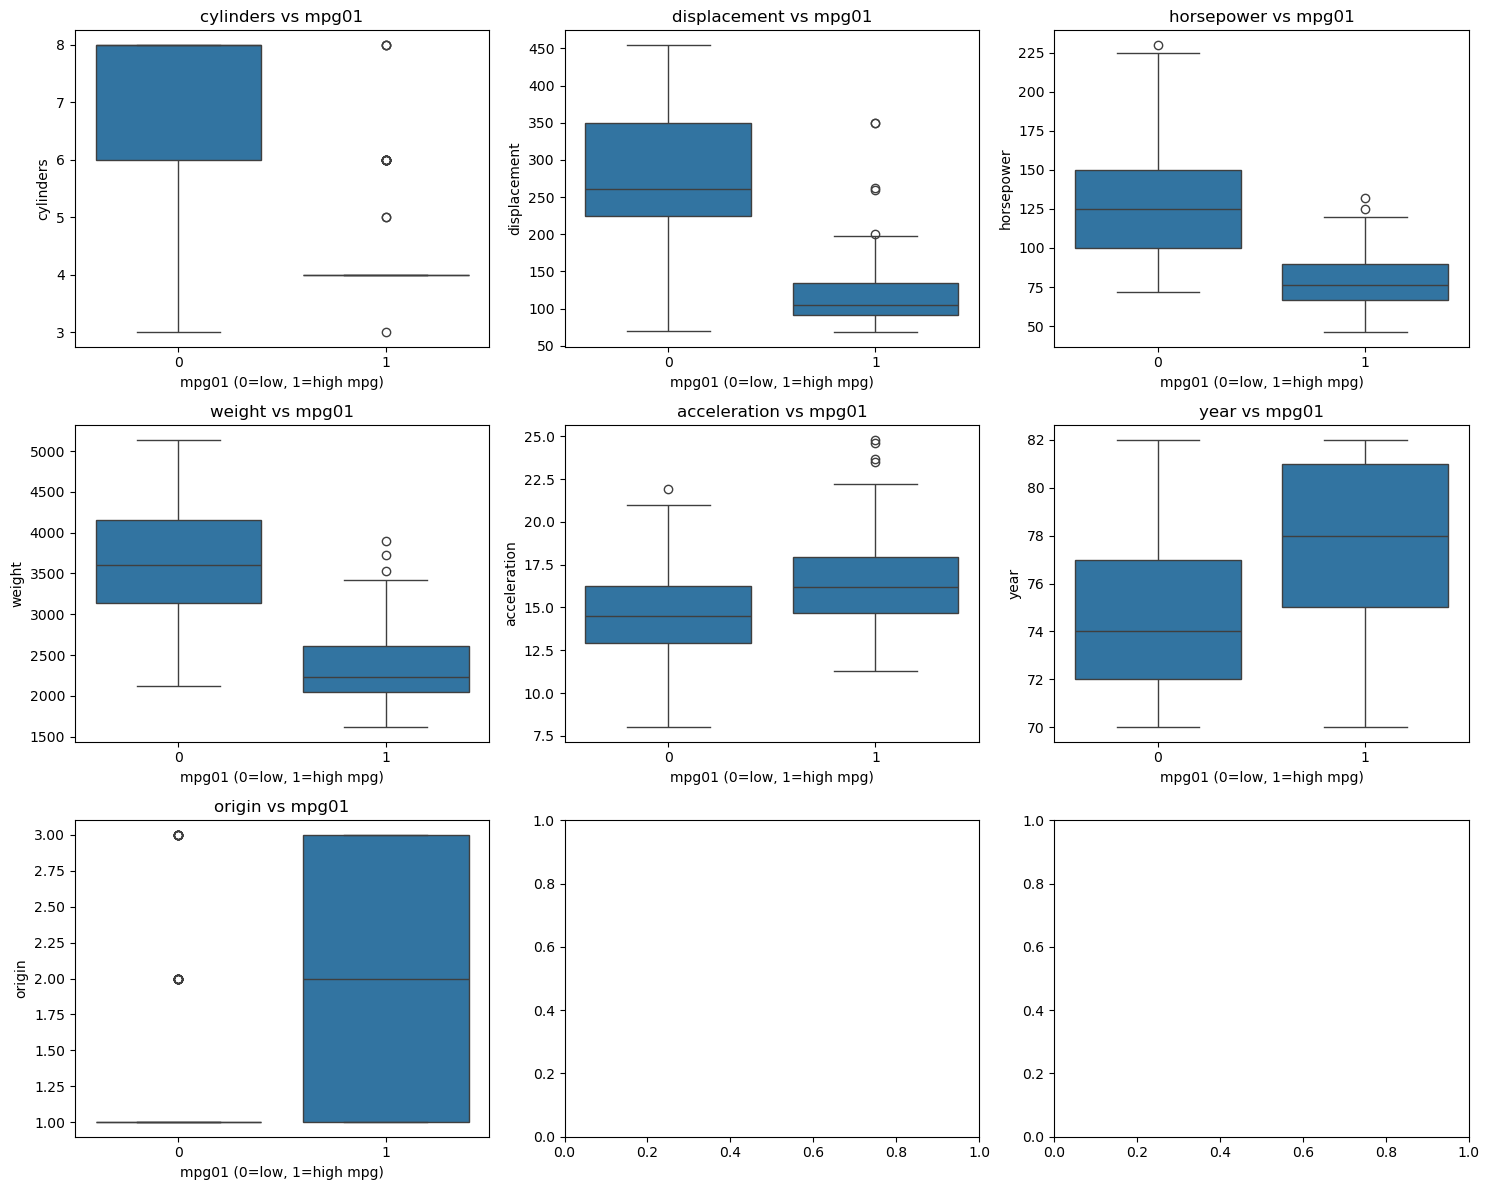


Correlations with mpg01 (absolute values):
cylinders       0.759194
weight          0.757757
displacement    0.753477
horsepower      0.667053
origin          0.513698
year            0.429904
acceleration    0.346822
Name: mpg01, dtype: float64

Most predictive features (highest correlation):
cylinders: 0.759 (negative)
weight: 0.758 (negative)
displacement: 0.753 (negative)
horsepower: 0.667 (negative)
origin: 0.514 (positive)

Summary by mpg01 group:
       cylinders  displacement  horsepower   weight  acceleration   year  \
mpg01                                                                      
0           6.77        273.16      130.11  3620.40         14.59  74.40   
1           4.18        115.67       78.83  2334.77         16.50  77.56   

       origin  
mpg01          
0        1.16  
1        1.99  


In [25]:
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

# Remove mpg and name columns for analysis
numeric_cols = Auto.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['mpg', 'mpg01']]

print("Numeric features to analyze:", numeric_cols)

# Create plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

# Boxplots for each numeric variable
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=Auto, x='mpg01', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs mpg01')
    axes[i].set_xlabel('mpg01 (0=low, 1=high mpg)')

plt.tight_layout()
plt.show()

# Correlation analysis
correlations = Auto[numeric_cols + ['mpg01']].corr()['mpg01'].drop('mpg01').abs().sort_values(ascending=False)

print("\nCorrelations with mpg01 (absolute values):")
print(correlations)

print(f"\nMost predictive features (highest correlation):")
for feature, corr in correlations.head(5).items():
    direction = "positive" if Auto[feature].corr(Auto['mpg01']) > 0 else "negative"
    print(f"{feature}: {corr:.3f} ({direction})")

# Summary statistics by mpg01
print(f"\nSummary by mpg01 group:")
summary = Auto.groupby('mpg01')[numeric_cols].mean()
print(summary.round(2))

(c) Split the data into a training set and a test set.

In [27]:
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

# Prepare features (exclude mpg and name)
X = Auto.drop(['mpg', 'mpg01'], axis=1)
y = Auto['mpg01']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [28]:
# Find most associated variables (from part b)
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("Feature correlations with mpg01:")
print(correlations)

# Use top features (typically weight, displacement, horsepower, cylinders)
top_features = correlations.head(4).index.tolist()
print(f"\nUsing top features: {top_features}")

# Select features for LDA
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Fit LDA model
lda = LDA()
lda.fit(X_train_selected, y_train)

# Make predictions
y_pred = lda.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"\nLDA Results:")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test error: {test_error:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
print(cm)
print(f"Correct predictions: {np.sum(np.diag(cm))}/{len(y_test)}")

Feature correlations with mpg01:
cylinders       0.759194
weight          0.757757
displacement    0.753477
horsepower      0.667053
origin          0.513698
year            0.429904
acceleration    0.346822
dtype: float64

Using top features: ['cylinders', 'weight', 'displacement', 'horsepower']

LDA Results:
Test accuracy: 0.8644
Test error: 0.1356
Confusion Matrix:
[[51 14]
 [ 2 51]]
Correct predictions: 102/118


(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [29]:
# Use same top features as LDA
correlations = X.corrwith(y).abs().sort_values(ascending=False)
top_features = correlations.head(4).index.tolist()
print(f"Using top features: {top_features}")

# Select features for QDA
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Fit QDA model
qda = QDA()
qda.fit(X_train_selected, y_train)

# Make predictions
y_pred = qda.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"\nQDA Results:")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test error: {test_error:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
print(cm)
print(f"Correct predictions: {np.sum(np.diag(cm))}/{len(y_test)}")

Using top features: ['cylinders', 'weight', 'displacement', 'horsepower']

QDA Results:
Test accuracy: 0.8559
Test error: 0.1441
Confusion Matrix:
[[51 14]
 [ 3 50]]
Correct predictions: 101/118


(f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [30]:
# Select features for Logistic Regression
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Fit Logistic Regression model
logistic = LogisticRegression(random_state=42, max_iter=1000)
logistic.fit(X_train_selected, y_train)

# Make predictions
y_pred = logistic.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"\nLogistic Regression Results:")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test error: {test_error:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
print(cm)
print(f"Correct predictions: {np.sum(np.diag(cm))}/{len(y_test)}")


Logistic Regression Results:
Test accuracy: 0.8644
Test error: 0.1356
Confusion Matrix:
[[51 14]
 [ 2 51]]
Correct predictions: 102/118


(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

In [31]:
# Select features for Naive Bayes
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Fit Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Make predictions
y_pred = nb.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"\nNaive Bayes Results:")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test error: {test_error:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
print(cm)
print(f"Correct predictions: {np.sum(np.diag(cm))}/{len(y_test)}")


Naive Bayes Results:
Test accuracy: 0.8644
Test error: 0.1356
Confusion Matrix:
[[51 14]
 [ 2 51]]
Correct predictions: 102/118


(h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [32]:
# Select and standardize features for KNN
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Test different K values
k_values = [1, 3, 5, 7, 9, 11, 15, 21, 25]
results = []

print("\nKNN Results for different K values:")
print("-" * 40)

for k in k_values:
    # Fit KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate test error
    test_accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - test_accuracy
    
    results.append({'k': k, 'accuracy': test_accuracy, 'error': test_error})
    print(f"K = {k:2d}: Test accuracy = {test_accuracy:.4f}, Test error = {test_error:.4f}")

# Find best K
best_result = min(results, key=lambda x: x['error'])
print(f"\nBest performing K: {best_result['k']}")
print(f"Best test accuracy: {best_result['accuracy']:.4f}")
print(f"Best test error: {best_result['error']:.4f}")

# Show confusion matrix for best K
best_knn = KNeighborsClassifier(n_neighbors=best_result['k'])
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

print(f"\nConfusion Matrix for K = {best_result['k']}:")
print(cm)
print(f"Correct predictions: {np.sum(np.diag(cm))}/{len(y_test)}")


KNN Results for different K values:
----------------------------------------
K =  1: Test accuracy = 0.8475, Test error = 0.1525
K =  3: Test accuracy = 0.8559, Test error = 0.1441
K =  5: Test accuracy = 0.8644, Test error = 0.1356
K =  7: Test accuracy = 0.8644, Test error = 0.1356
K =  9: Test accuracy = 0.8644, Test error = 0.1356
K = 11: Test accuracy = 0.8644, Test error = 0.1356
K = 15: Test accuracy = 0.8644, Test error = 0.1356
K = 21: Test accuracy = 0.8644, Test error = 0.1356
K = 25: Test accuracy = 0.8644, Test error = 0.1356

Best performing K: 5
Best test accuracy: 0.8644
Best test error: 0.1356

Confusion Matrix for K = 5:
[[50 15]
 [ 1 52]]
Correct predictions: 102/118


### Question 16

Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, naive Bayes, and KNN models using
various subsets of the predictors. Describe your findings.
Hint: You will have to create the response variable yourself, using the
variables that are contained in the Boston data set.

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Load Boston dataset using ISLP
print("Loading Boston Housing Dataset...")
boston = load_data('Boston')
print("All columns in dataset:", list(boston.columns))
print("\nDataset shape:", boston.shape)

# Look at first few rows to understand the data
print("\nFirst few rows:")
print(boston.head())

# Create binary response variable based on crime rate (crim)
crime_rate = boston['crim'].values
median_crime = np.median(crime_rate)
print(f"Median crime rate: {median_crime:.4f}")

# Create binary target: 1 if above median, 0 if below median
y = (crime_rate > median_crime).astype(int)
print(f"High crime suburbs: {np.sum(y)} ({np.mean(y)*100:.1f}%)")
print(f"Low crime suburbs: {np.sum(1-y)} ({np.mean(1-y)*100:.1f}%)")

# Remove crim from predictors since we're predicting based on it
# Keep all other columns as predictors
X_predictors = boston.drop('crim', axis=1)
print(f"\nPredictors (excluding crim): {list(X_predictors.columns)}")
print(f"Number of predictors: {len(X_predictors.columns)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_predictors, y, test_size=0.3, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Fit model and return evaluation metrics"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'predictions': y_pred,
        'model': model
    }

def test_predictor_subsets():
    """Test different subsets of predictors"""
    
    # Define different predictor subsets
    predictor_subsets = {
        'All predictors': list(X_predictors.columns),
        'Socioeconomic': ['lstat', 'medv', 'rm'],  # % lower status, median value, avg rooms
        'Environmental': ['nox', 'dis', 'age'],    # pollution, distance to employment, age of homes
        'Location': ['dis', 'rad', 'tax'],         # distance, highway access, tax rate
        'Housing quality': ['rm', 'age', 'medv'], # rooms, age, median value
        'Top 5 features': ['lstat', 'rm', 'ptratio', 'medv', 'nox']  # Based on correlation with crime
    }
    
    results = []
    
    for subset_name, features in predictor_subsets.items():
        print(f"\n{'='*60}")
        print(f"Testing predictor subset: {subset_name}")
        print(f"Features: {features}")
        print('='*60)
        
        # Get subset of data
        X_train_subset = X_train[features]
        X_test_subset = X_test[features]
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_subset)
        X_test_scaled = scaler.transform(X_test_subset)
        
        subset_results = []
        
        # 1. Logistic Regression
        lr = LogisticRegression(random_state=42, max_iter=1000)
        lr_result = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression')
        subset_results.append(lr_result)
        print(f"Logistic Regression: {lr_result['accuracy']:.4f}")
        
        # 2. LDA
        lda = LDA()
        lda_result = evaluate_model(lda, X_train_scaled, X_test_scaled, y_train, y_test, 'LDA')
        subset_results.append(lda_result)
        print(f"LDA: {lda_result['accuracy']:.4f}")
        
        # 3. Naive Bayes
        nb = GaussianNB()
        nb_result = evaluate_model(nb, X_train_scaled, X_test_scaled, y_train, y_test, 'Naive Bayes')
        subset_results.append(nb_result)
        print(f"Naive Bayes: {nb_result['accuracy']:.4f}")
        
        # 4. KNN with different K values
        best_knn_acc = 0
        best_k = 0
        best_knn_result = None
        
        for k in [1, 3, 5, 7, 9, 11, 15, 21]:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn_result = evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test, f'KNN (k={k})')
            
            if knn_result['accuracy'] > best_knn_acc:
                best_knn_acc = knn_result['accuracy']
                best_k = k
                best_knn_result = knn_result
        
        subset_results.append(best_knn_result)
        print(f"Best KNN (k={best_k}): {best_knn_acc:.4f}")
        
        # Store results with subset info
        for result in subset_results:
            result['predictor_subset'] = subset_name
            result['num_features'] = len(features)
            results.append(result)
    
    return results

# Run the analysis
print("Starting comprehensive analysis...")
all_results = test_predictor_subsets()

# Find best overall model
best_result = max(all_results, key=lambda x: x['accuracy'])

print(f"\n{'='*80}")
print("BEST PERFORMING MODEL")
print('='*80)
print(f"Method: {best_result['model_name']}")
print(f"Predictor subset: {best_result['predictor_subset']}")
print(f"Number of features: {best_result['num_features']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"Confusion Matrix:")
print(best_result['confusion_matrix'])

# Summary table
print(f"\n{'='*80}")
print("SUMMARY OF ALL RESULTS")
print('='*80)

# Create summary DataFrame
summary_data = []
for result in all_results:
    summary_data.append({
        'Predictor Subset': result['predictor_subset'],
        'Method': result['model_name'],
        'Features': result['num_features'],
        'Accuracy': result['accuracy']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Accuracy', ascending=False)
print(summary_df.to_string(index=False))

# Analyze feature importance for logistic regression
print(f"\n{'='*60}")
print("FEATURE ANALYSIS")
print('='*60)

# Correlation with crime rate
correlations = X_predictors.corrwith(pd.Series(y, index=X_predictors.index))
correlations_abs = correlations.abs().sort_values(ascending=False)

print("Features most correlated with high crime rate:")
for feature, corr in correlations_abs.head(8).items():
    direction = "positive" if correlations[feature] > 0 else "negative"
    print(f"{feature:8s}: {corr:.3f} ({direction})")

print(f"\n{'='*60}")
print("KEY FINDINGS")
print('='*60)

# Analysis of results
best_subset = summary_df.groupby('Predictor Subset')['Accuracy'].max().sort_values(ascending=False)
best_method = summary_df.groupby('Method')['Accuracy'].max().sort_values(ascending=False)

print(f"Best predictor subset: {best_subset.index[0]} (accuracy: {best_subset.iloc[0]:.4f})")
print(f"Best method overall: {best_method.index[0]} (accuracy: {best_method.iloc[0]:.4f})")

print(f"\nTop 3 predictor subsets:")
for i, (subset, acc) in enumerate(best_subset.head(3).items()):
    print(f"{i+1}. {subset}: {acc:.4f}")

print(f"\nMethod performance ranking:")
for i, (method, acc) in enumerate(best_method.items()):
    print(f"{i+1}. {method}: {acc:.4f}")

# Additional insights
print(f"\nInsights:")
print(f"- Using all {len(X_predictors.columns)} predictors vs. selected subsets")
print(f"- Feature selection can improve or hurt performance depending on the method")
print(f"- KNN performance varies significantly with k value")
print(f"- Standardization is important for distance-based methods (KNN, LDA)")

# Performance by number of features
feature_performance = summary_df.groupby('Features')['Accuracy'].agg(['mean', 'max', 'std']).round(4)
print(f"\nPerformance by number of features:")
print(feature_performance)

print(f"\nTo use the best model:")
print(f"- Method: {best_result['model_name']}")
print(f"- Features: {best_result['predictor_subset']}")
print(f"- Expected accuracy: {best_result['accuracy']:.1%}")

Loading Boston Housing Dataset...
All columns in dataset: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

Dataset shape: (506, 13)

First few rows:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
Median crime rate: 0.2565
High crime suburbs: 253 (50.0%)
Low crime suburbs: 253 (50.0%)

Predictors (excluding crim): ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
Num

Best model:
- Method: KNN (k=3)
- Features: Location
- Expected accuracy: 94.7%